<a href="https://colab.research.google.com/github/brgd862807/evaluacion-final-u2-ml/blob/main/Copia_de_examen_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar librerías y cargar dataset de hormigón**

Integrantes:
Alexis Muela;
Bruno Guzmán;
Andrés Vásquez;
Santiago Pinzón;Alexis Tupiza

Se ha encontrado un dataset de hormigón con diferens caracteristicas, esto nos permitirá crear un modelo para ver si un material es de alta resitencia o baja resitencia.

In [ ]:
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix, accuracy_score

# Para que los gráficos se vean en el notebook
%matplotlib inline

# Fijamos semilla para que los resultados sean reproducibles
np.random.seed(1)



In [ ]:

# CARGA DEL DATASET


# Dataset: Concrete Compressive Strength (hormigón)
concrete = fetch_openml(data_id=4353, as_frame=True)

# Pasamos a DataFrame de pandas
df = concrete.frame.copy()

print("Columnas originales del dataset:")
print(df.columns)



Columnas originales del dataset:
Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa. megapascals)'],
      dtype='object')


In [ ]:
print("\nPrimeras 5 filas del dataset original:")
print(df.head())

print("\nDimensiones del dataset (filas, columnas):", df.shape)


Primeras 5 filas del dataset original:
   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (comp

In [ ]:

#  EDA básico


# Renombramos la columna de resistencia para que el nombre sea más sencillo
df = df.rename(columns={
    'Concrete compressive strength(MPa. megapascals)': 'strength_MPa','Cement (component 1)(kg in a m^3 mixture)': 'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'slag', 'Fly Ash (component 3)(kg in a m^3 mixture)': 'fly_ash',
    'Water  (component 4)(kg in a m^3 mixture)': 'water', 'Superplasticizer (component 5)(kg in a m^3 mixture)': 'superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarse_aggregate', 'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fine_aggregate',
    'Age (day)': 'age'
})

print("Columnas después de renombrar:")
print(df.columns)


Columnas después de renombrar:
Index(['cement', 'slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'strength_MPa'],
      dtype='object')


In [ ]:
print("\nInformación del DataFrame:")
print(df.info())




Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   fly_ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_aggregate  1030 non-null   float64
 6   fine_aggregate    1030 non-null   float64
 7   age               1030 non-null   float64
 8   strength_MPa      1030 non-null   float64
dtypes: float64(9)
memory usage: 72.6 KB
None


In [ ]:
print("\nEstadísticos descriptivos (describe):")
print(df.describe())




Estadísticos descriptivos (describe):
            cement         slag      fly_ash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.167864    73.895825    54.188350   181.567282          6.204660   
std     104.506364    86.279342    63.997004    21.354219          5.973841   
min     102.000000     0.000000     0.000000   121.800000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.400000   
75%     350.000000   142.950000   118.300000   192.000000         10.200000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

       coarse_aggregate  fine_aggregate          age  strength_MPa  
count       1030.000000     1030.000000  1030.000000   1030.000000  
mean         972.918932      773.580485    45.662136     35.817961  
std           77.753954       80.175980   

In [ ]:
print("\nPrimeras 5 filas del dataset con 'strength_MPa':")
print(df.head())


Primeras 5 filas del dataset con 'strength_MPa':
   cement   slag  fly_ash  water  superplasticizer  coarse_aggregate  \
0   540.0    0.0      0.0  162.0               2.5            1040.0   
1   540.0    0.0      0.0  162.0               2.5            1055.0   
2   332.5  142.5      0.0  228.0               0.0             932.0   
3   332.5  142.5      0.0  228.0               0.0             932.0   
4   198.6  132.4      0.0  192.0               0.0             978.4   

   fine_aggregate    age  strength_MPa  Class  
0           676.0   28.0         79.99      1  
1           676.0   28.0         61.89      1  
2           594.0  270.0         40.27      1  
3           594.0  365.0         41.05      1  
4           825.5  360.0         44.30      1  



Generando histogramas de todas las columnas...


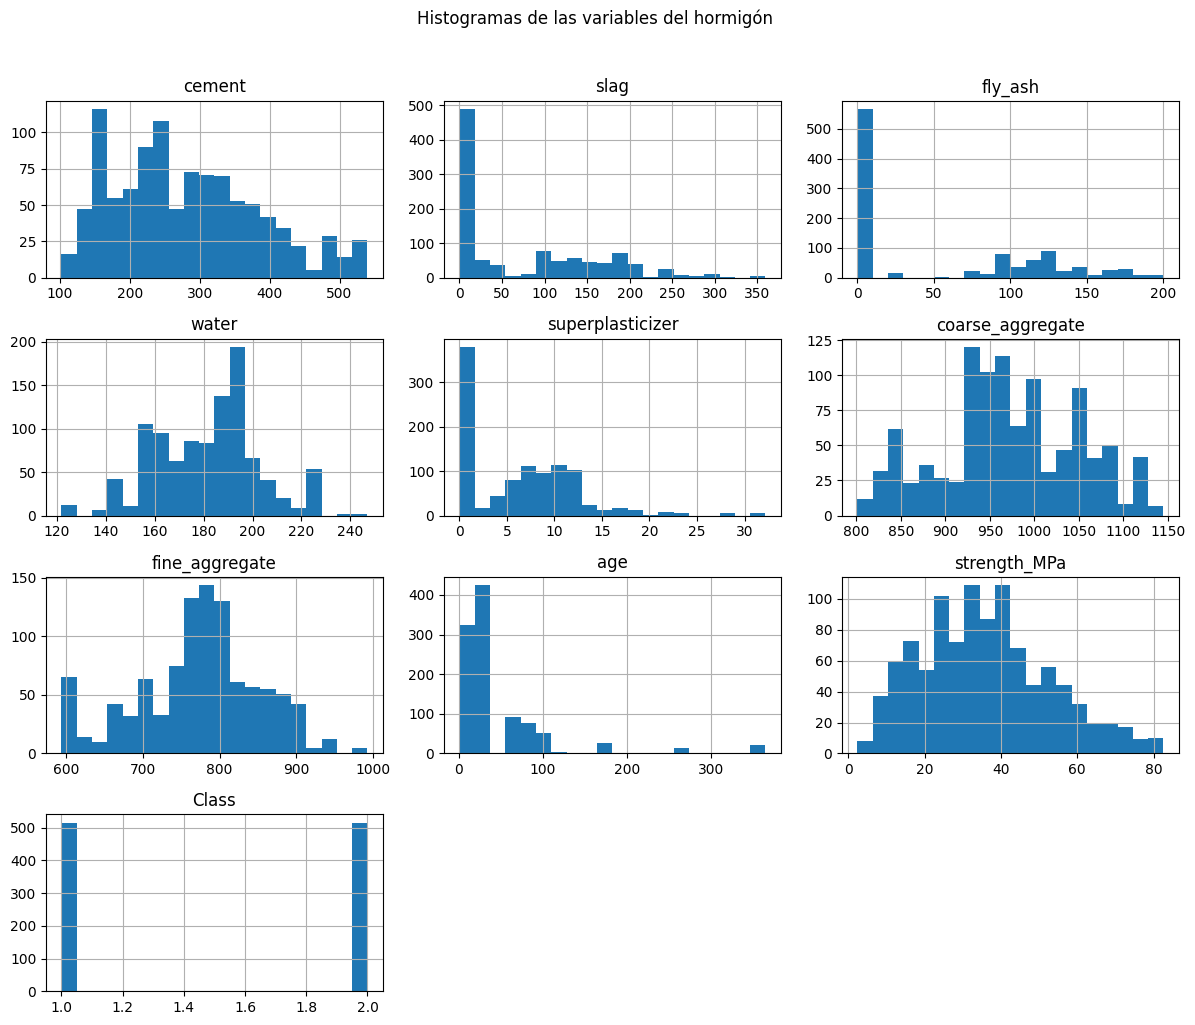

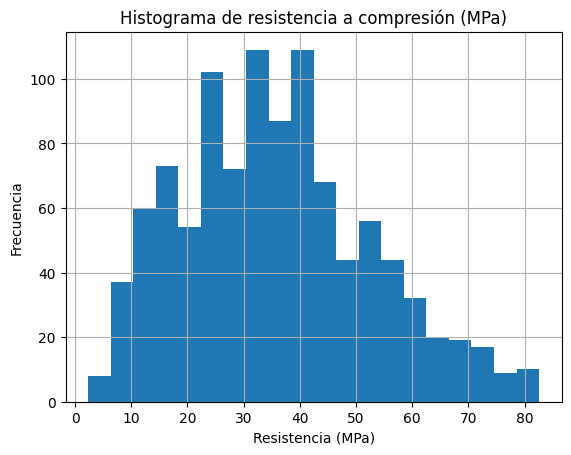

In [ ]:

# HISTOGRAMAS


# Histogramas de todas las variables numéricas
print("\nGenerando histogramas de todas las columnas...")
df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histogramas de las variables del hormigón", y=1.02)
plt.tight_layout()
plt.show()

# Histograma solo de la resistencia a compresión
plt.figure()
df["strength_MPa"].hist(bins=20)
plt.title("Histograma de resistencia a compresión (MPa)")
plt.xlabel("Resistencia (MPa)")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:

# BLOQUE 3: Crear columna 'Class' y dividir en train/test


# Calculamos la mediana de la resistencia
median_strength = df["strength_MPa"].median()
print("Mediana de resistencia (MPa):", median_strength)



Mediana de resistencia (MPa): 34.445


In [ ]:

# Creamos la columna 'Class':
# 1 = alta resistencia, 2 = baja resistencia
df["Class"] = np.where(df["strength_MPa"] >= median_strength, 1, 2)

print("\nConteo de cada clase:")
print(df["Class"].value_counts())




Conteo de cada clase:
Class
1    515
2    515
Name: count, dtype: int64


In [ ]:
# Para entrenar el modelo KNN NO vamos a usar directamente 'strength_MPa'
# porque esa es la salida original del problema.
# Usaremos solo los componentes, el agua, áridos, etc. y la edad (Age).
df_model = df.drop(columns=["strength_MPa"])

print("\nColumnas que se usarán en el modelo (features + Class al final):")
print(df_model.columns)

print("\nPrimeras 5 filas del df_model:")
print(df_model.head())




Columnas que se usarán en el modelo (features + Class al final):
Index(['cement', 'slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'Class'],
      dtype='object')

Primeras 5 filas del df_model:
   cement   slag  fly_ash  water  superplasticizer  coarse_aggregate  \
0   540.0    0.0      0.0  162.0               2.5            1040.0   
1   540.0    0.0      0.0  162.0               2.5            1055.0   
2   332.5  142.5      0.0  228.0               0.0             932.0   
3   332.5  142.5      0.0  228.0               0.0             932.0   
4   198.6  132.4      0.0  192.0               0.0             978.4   

   fine_aggregate    age  Class  
0           676.0   28.0      1  
1           676.0   28.0      1  
2           594.0  270.0      1  
3           594.0  365.0      1  
4           825.5  360.0      1  


In [ ]:

# TRAIN / TEST SPLIT (70% / 30%)

# Creamos una máscara booleana aleatoria:
# True  -> fila va a TRAIN
# False -> fila va a TEST
msk = np.random.rand(len(df_model)) < 0.7

train = df_model[msk].reset_index(drop=True)
test = df_model[~msk].reset_index(drop=True)

print("\nNúmero de observaciones en el training data:", len(train))
print("Número de observaciones en el test data:", len(test))




Número de observaciones en el training data: 706
Número de observaciones en el test data: 324


In [ ]:
# Proporciones reales
train_prop = msk.mean()
test_prop = 1 - train_prop

print("\nProporción aproximada de train:", train_prop)
print("Proporción aproximada de test:", test_prop)






Proporción aproximada de train: 0.6854368932038835
Proporción aproximada de test: 0.31456310679611654

Primeras filas del TRAIN:
   cement   slag  fly_ash  water  superplasticizer  coarse_aggregate  \
0   540.0    0.0      0.0  162.0               2.5            1040.0   
1   540.0    0.0      0.0  162.0               2.5            1055.0   
2   332.5  142.5      0.0  228.0               0.0             932.0   
3   266.0  114.0      0.0  228.0               0.0             932.0   
4   380.0   95.0      0.0  228.0               0.0             932.0   

   fine_aggregate    age  Class  
0           676.0   28.0      1  
1           676.0   28.0      1  
2           594.0  270.0      1  
3           670.0   90.0      1  
4           594.0  365.0      1  

Primeras filas del TEST:
   cement   slag  fly_ash  water  superplasticizer  coarse_aggregate  \
0   332.5  142.5      0.0  228.0               0.0             932.0   
1   198.6  132.4      0.0  192.0               0.0             

In [ ]:
print("\nPrimeras filas del TRAIN:")
print(train.head())




Primeras filas del TRAIN:
   cement   slag  fly_ash  water  superplasticizer  coarse_aggregate  \
0   540.0    0.0      0.0  162.0               2.5            1040.0   
1   540.0    0.0      0.0  162.0               2.5            1055.0   
2   332.5  142.5      0.0  228.0               0.0             932.0   
3   266.0  114.0      0.0  228.0               0.0             932.0   
4   380.0   95.0      0.0  228.0               0.0             932.0   

   fine_aggregate    age  Class  
0           676.0   28.0      1  
1           676.0   28.0      1  
2           594.0  270.0      1  
3           670.0   90.0      1  
4           594.0  365.0      1  


In [ ]:
print("\nPrimeras filas del TEST:")
print(test.head())


Primeras filas del TEST:
   cement   slag  fly_ash  water  superplasticizer  coarse_aggregate  \
0   332.5  142.5      0.0  228.0               0.0             932.0   
1   198.6  132.4      0.0  192.0               0.0             978.4   
2   266.0  114.0      0.0  228.0               0.0             932.0   
3   427.5   47.5      0.0  228.0               0.0             932.0   
4   139.6  209.4      0.0  192.0               0.0            1047.0   

   fine_aggregate    age  Class  
0           594.0  365.0      1  
1           825.5  360.0      1  
2           670.0   28.0      1  
3           594.0  270.0      1  
4           806.9   90.0      1  


In [ ]:

# Convertimos a listas de listas


trainingSet = train.values.tolist()
testSet = test.values.tolist()

print("\nEjemplo de una fila del trainingSet (lista):")
print(trainingSet[0])
print("Longitud de la fila (features + Class):", len(trainingSet[0]))


Ejemplo de una fila del trainingSet (lista):
[540.0, 0.0, 0.0, 162.0, 2.5, 1040.0, 676.0, 28.0, 1.0]
Longitud de la fila (features + Class): 9


In [ ]:

#  Funciones del modelo KNN


# 1) Distancia Euclidiana entre dos filas
def euclideanDistance(instance1, instance2, length):
    """
    Calcula la distancia euclidiana entre dos observaciones (filas).
    instance1 y instance2 son listas de números.
    length indica cuántas columnas usamos como features (sin incluir la clase).
    """
    distance = 0.0
    for x in range(length):
        distance += (instance1[x] - instance2[x]) ** 2
    return math.sqrt(distance)

# 2) Obtener los k vecinos más cercanos
def getNeighbors(trainingSet, testInstance, k):
    """
    Para una fila de test (testInstance), calcula la distancia a todas las filas
    del trainingSet y devuelve los k más cercanos.
    """
    distances = []  # Lista para guardar (fila_train, distancia)
    length = len(testInstance) - 1  # -1 porque la última posición es la clase

    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))

    # Ordenamos la lista por la distancia (segunda posición de la tupla)
    distances.sort(key=operator.itemgetter(1))

    # Tomamos solo los k vecinos más cercanos
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])

    return neighbors

# 3) Elegir la clase más frecuente entre los vecinos
def getResponse(neighbors):
    """
    Cuenta cuántas veces aparece cada clase en los vecinos
    y devuelve la clase con más votos.
    """
    classVotes = {}  # Diccionario: clase -> conteo

    for x in range(len(neighbors)):
        # La clase está en la última posición de la lista
        response = neighbors[x][-1]

        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1

    # Ordenamos el diccionario por el conteo (valor), de mayor a menor
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)

    # Devolvemos la clase con más votos
    return sortedVotes[0][0]

# 4) Calcular la exactitud (accuracy) del modelo
def getAccuracy(testSet, predictions):
    """
    Compara las clases reales vs predichas y calcula el porcentaje de aciertos.
    """
    correct = 0
    for x in range(len(testSet)):
        # testSet[x][-1] = clase real
        # predictions[x]  = clase predicha
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct / float(len(testSet))) * 100.0


In [ ]:

#  Ejecutar KNN y evaluar el modelo


# Elegimos un valor de k (por ejemplo, 5 vecinos)
k = 5

predictions = []  # Lista donde guardaremos las clases predichas

print("Ejecutando KNN sobre el conjunto de TEST...\n")

for i in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[i], k)
    result = getResponse(neighbors)  # clase predicha
    predictions.append(result)

    # Mostramos las primeras 10 predicciones para entender qué hace el modelo
    if i < 10:
        print(f"Ejemplo {i}: Predicho = {result}, Real = {testSet[i][-1]}")



Ejecutando KNN sobre el conjunto de TEST...

Ejemplo 0: Predicho = 1.0, Real = 1.0
Ejemplo 1: Predicho = 1.0, Real = 1.0
Ejemplo 2: Predicho = 1.0, Real = 1.0
Ejemplo 3: Predicho = 1.0, Real = 1.0
Ejemplo 4: Predicho = 2.0, Real = 1.0
Ejemplo 5: Predicho = 1.0, Real = 1.0
Ejemplo 6: Predicho = 1.0, Real = 1.0
Ejemplo 7: Predicho = 1.0, Real = 1.0
Ejemplo 8: Predicho = 1.0, Real = 1.0
Ejemplo 9: Predicho = 1.0, Real = 1.0


In [ ]:

# Accuracy (exactitud)


# Usamos también sklearn para verificar
y_test = [row[-1] for row in testSet]

accuracy_sklearn = accuracy_score(y_test, predictions)
print(f"Accuracy con sklearn: {accuracy_sklearn * 100:.2f}%")




Accuracy con sklearn: 81.79%


In [ ]:

# Matriz de confusión


print("\nMatriz de confusión (filas = clase real, columnas = clase predicha):")
cm = confusion_matrix(y_test, predictions)
print(cm)


Matriz de confusión (filas = clase real, columnas = clase predicha):
[[123  31]
 [ 28 142]]


# **Conclusión**
En este trabajo se aplicó el algoritmo KNN sobre un dataset de hormigón, clasificando las mezclas en alta y baja resistencia a partir de sus dosificaciones y condiciones (cemento, agua, agregados, aditivos y edad). El ejercicio permitió mostrar cómo, usando únicamente la similitud con datos históricos, es posible anticipar el desempeño de una mezcla antes de obtener la resistencia a 28 días, planteando un esquema de control de calidad más preventivo. Se concluye además que este enfoque es transferible a otros procesos de la operación minera, integrándolo con bases de datos y dashboards para apoyar la toma de decisiones basada en datos.